In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Import dataset
dataset = pd.read_csv('Student_Marks.csv')
dataset.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
# Mengecek jumlah nilai yang hilang (missing value) dalam setiap kolom DataFrame
dataset.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

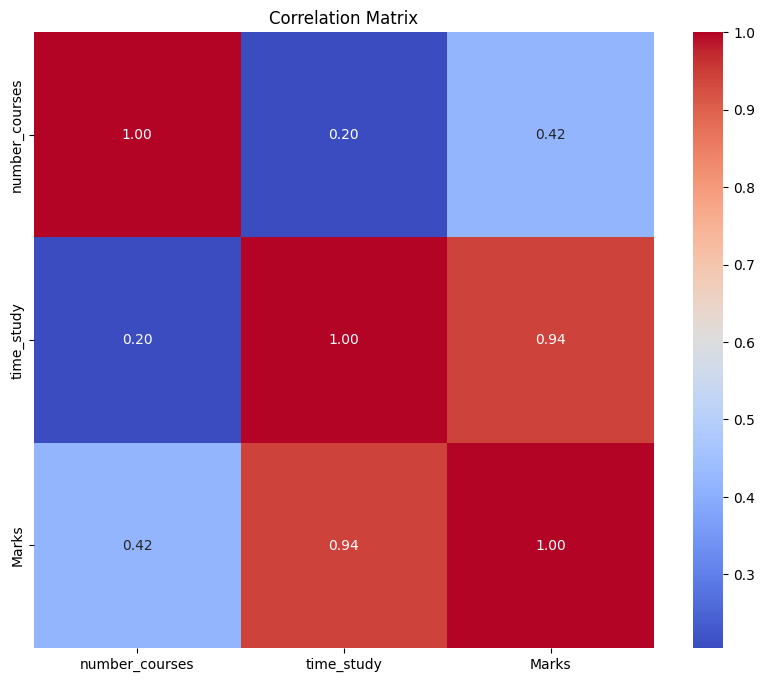

In [5]:
# Exclude non-numeric column dari ecorrelation matrix
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Split data menjadi features (X) dan target variable (y)
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

In [10]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Ubah bentuk X_train dan X_test jika perlu
X_train = X_train.reshape(-1, 1)  # Ubah bentuk menjadi array 2 dimensi
X_test = X_test.reshape(-1, 1)    # Ubah bentuk menjadi array 2 dimensi

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Initialize ANN
regression_model = Sequential()

# Add input layer and hidden layers
regression_model.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
regression_model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# Add output layer
regression_model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile the model for regression
regression_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to training data
regression_model.fit(X_train, y_train, batch_size=8, epochs=100)

# Predict on test data
y_pred = regression_model.predict(X_test)

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 808.6626
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 808.1566
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 807.6145
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 807.0828
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 806.4794
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 805.8234
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 805.1481
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 804.3842
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 803.5328
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 802.5577
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 801.4506
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 800.1761
Epoch 13/100


In [13]:
# Calculate RMSE
rmse_modified = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae_modified = mean_absolute_error(y_test, y_pred)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print modified metrics
print("Root Mean Square Error (RMSE):", rmse_modified)
print("Mean Absolute Error (MAE):", mae_modified)
print("R-squared (R^2):", r_squared)

Root Mean Square Error (RMSE): 4.013239946067064
Mean Absolute Error (MAE): 3.24169791507721
R-squared (R^2): 0.9076470291782653


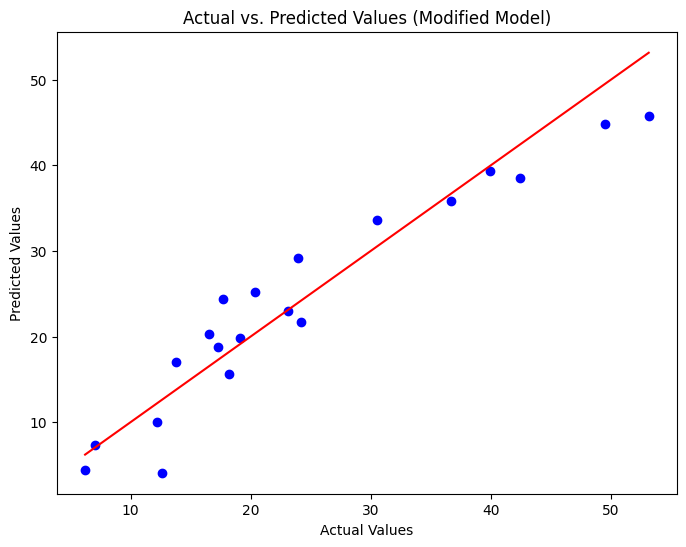

In [14]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.title('Actual vs. Predicted Values (Modified Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
